# Telco Customer Churn 

Download data from - https://www.kaggle.com/datasets/blastchar/telco-customer-churn/data

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib as mpl 

In [2]:
df_raw = pd.read_csv('data/video18/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df_raw.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
# Firstly Customer ID is continous data - not needed! 
df = df_raw.drop(columns=["customerID"])

In [5]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
for column in df.columns:
    print (f"{column} : {df[column].unique()}")

gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2

In [7]:
# total charges seems to be non-numeric; convert this to numeric 
df[pd.to_numeric(df["TotalCharges"],errors="coerce").isnull()].shape

(11, 20)

In [8]:
# covert these to numeric values 
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"],errors="coerce")

In [ ]:
# get rid of these values
df = df[~df["TotalCharges"].isnull()]

In [13]:
df["TotalCharges"].describe()

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64

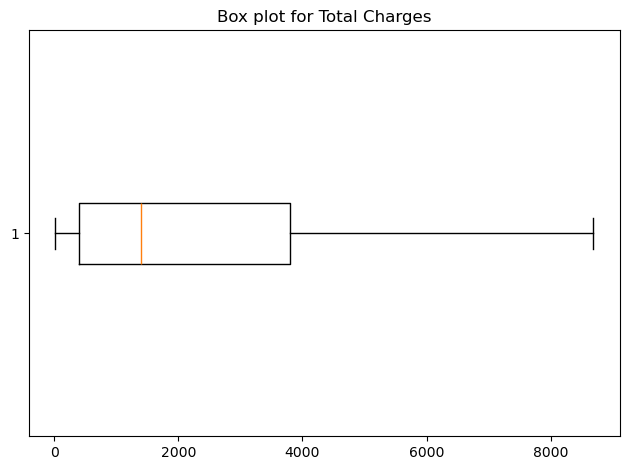

In [14]:
# create a boxplot
plt.boxplot(df["TotalCharges"], vert=False)
plt.title("Box plot for Total Charges")
plt.tight_layout()

In [15]:
for column in df.columns:
    print (f"{column} : {df[column].unique()}")

gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78

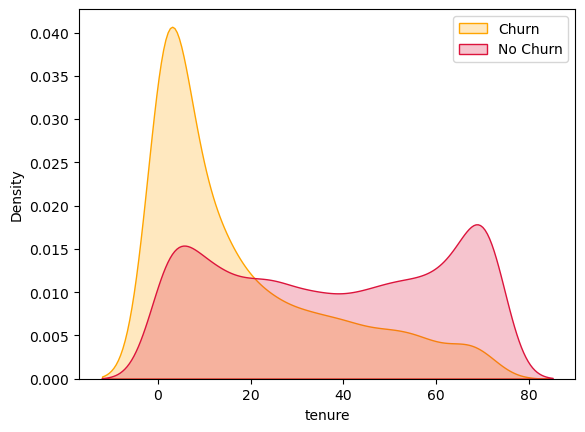

In [ ]:
# lets check the data distribution for tenure; long tenured people are less like to move out 
df_tenure_churn = df[df["Churn"] == "Yes"]["tenure"]
df_tenure_no_churn = df[df["Churn"] == "No"]["tenure"]

import seaborn as sns
ax = sns.kdeplot(df_tenure_churn, fill=True, color="orange", label="Churn")
ax = sns.kdeplot(df_tenure_no_churn, fill=True, color="crimson", label="No Churn")
plt.legend()
plt.title("Data Distribution for Churned Customer against tenure")

In [47]:
# check for non numeric coulmns 
def show_unique_values(data_type = "all", df=df):

    if data_type == "object": 
        for column in df.columns:
            if df[column].dtype == "object":
                print (f"{column} : {df[column].unique()}")
    else: 
        for column in df.columns:
            print (f"{column} : {df[column].unique()}")

In [34]:
# Lets convert No internet service to No 
df.replace("No internet service", "No", inplace=True)


In [35]:
# similar convert No phone service to No 
df.replace("No phone service", "No", inplace=True)

In [38]:
show_unique_values("object")

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [39]:
# convert yes/no columns to binary values 
yes_no_columns = [
    "Partner", "Dependents", "PhoneService", "MultipleLines", "OnlineSecurity", "OnlineBackup", "DeviceProtection", 
    "TechSupport", "StreamingTV", "StreamingMovies", "PaperlessBilling", "Churn"
]

for col in yes_no_columns:
    df[col].replace({'Yes' : 1, 'No' : 0}, inplace=True)

/var/folders/kx/s0nzgxq96zgdm61_51783vnm0000gn/T/ipykernel_67579/3941642483.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].replace({'Yes' : 1, 'No' : 0}, inplace=True)
/var/folders/kx/s0nzgxq96zgdm61_51783vnm0000gn/T/ipykernel_67579/3941642483.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', 

In [41]:
show_unique_values("all")

gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : [0 1]
MultipleLines : [0 1]
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
TechSupport : [0 1]
StreamingTV : [0 1]
StreamingMovies : [0 1]
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : [1 0]
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn : [0 1]


In [42]:
# replace the gender as well 
df["gender"].replace({"Male" : 1, "Female": 0}, inplace=True)

/var/folders/kx/s0nzgxq96zgdm61_51783vnm0000gn/T/ipykernel_67579/2464575622.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["gender"].replace({"Male" : 1, "Female": 0}, inplace=True)


In [43]:
show_unique_values("all")

gender : [0 1]
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : [0 1]
MultipleLines : [0 1]
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
TechSupport : [0 1]
StreamingTV : [0 1]
StreamingMovies : [0 1]
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : [1 0]
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn : [0 1]


In [44]:
# perform one hot encoding for InternetService, Contract, PaymentMethod columns 
one_hot_columns = ["InternetService", "Contract", "PaymentMethod"]
df_scaled = pd.get_dummies(data=df, columns=one_hot_columns)
df_scaled.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,0,1,0,...,True,False,False,True,False,False,False,False,True,False
1,1,0,0,0,34,1,0,1,0,1,...,True,False,False,False,True,False,False,False,False,True
2,1,0,0,0,2,1,0,1,1,0,...,True,False,False,True,False,False,False,False,False,True
3,1,0,0,0,45,0,0,1,0,1,...,True,False,False,False,True,False,True,False,False,False
4,0,0,0,0,2,1,0,0,0,0,...,False,True,False,True,False,False,False,False,True,False


In [48]:
show_unique_values("all", df_scaled)

gender : [0 1]
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : [0 1]
MultipleLines : [0 1]
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
TechSupport : [0 1]
StreamingTV : [0 1]
StreamingMovies : [0 1]
PaperlessBilling : [1 0]
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn : [0 1]
InternetService_DSL : [ True False]
InternetService_Fiber optic : [False  True]
InternetService_No : [False  True]
Contract_Month-to-month : [ True False]
Contract_One year : [False  True]
Contract_Two year : [False  True]
PaymentMethod_Bank transfer (automatic) : [False  True]
PaymentMethod_Credit card (automatic) : [False  True]
PaymentMethod_Electroni

In [ ]:
# perform scaling of numeric data - tenure, MonthlyCharges, TotalCharges
numeric_columns = ["tenure", "MonthlyCharges", "TotalCharges"]

from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()

df_scaled[numeric_columns] = min_max_scaler.fit_transform(df_scaled[numeric_columns])
df_scaled.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,0.000000,0,0,0,1,0,...,True,False,False,True,False,False,False,False,True,False
1,1,0,0,0,0.464789,1,0,1,0,1,...,True,False,False,False,True,False,False,False,False,True
2,1,0,0,0,0.014085,1,0,1,1,0,...,True,False,False,True,False,False,False,False,False,True
3,1,0,0,0,0.619718,0,0,1,0,1,...,True,False,False,False,True,False,True,False,False,False
4,0,0,0,0,0.014085,1,0,0,0,0,...,False,True,False,True,False,False,False,False,True,False


```
Build Model

In [51]:
show_unique_values("all", df_scaled)

gender : [0 1]
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService : [0 1]
MultipleLines : [0 1]
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
Tech

In [122]:
X = df_scaled.drop("Churn", axis=1)
y = df_scaled["Churn"]

In [123]:
# split test and traning set 
from sklearn.model_selection import train_test_split

X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [124]:
X_train_full.shape, X_test.shape

((5625, 26), (1407, 26))

In [125]:
from tensorflow import keras 
import tensorflow as tf 

In [126]:
X_train_full.shape

(5625, 26)

In [177]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [178]:
model = keras.models.Sequential()
model.add(keras.layers.Input(shape=(26,)))
model.add(keras.layers.Dense(20, activation="relu"))
model.add(keras.layers.Dense(15, activation="relu"))
model.add(keras.layers.Dense(1, activation="sigmoid"))

model.compile(loss="binary_crossentropy", optimizer="SGD", metrics=["accuracy"])

In [179]:
import time 
import os 

def get_run_logdir(root_logdir="tensorboard_logs", name=""):
    run_id = time.strftime(f"{name}_%Y%m%d%H%M%S")
    return os.path.join(root_logdir, run_id)

In [180]:
# create checkpoints 
FILE_NAME = f"output/video18/telco_customer_churn.keras"
log_dir = get_run_logdir(name="telco_churn")

# create checkpoints - one to save the best model and another one with early stopping 
early_stopping_chkp = keras.callbacks.EarlyStopping(patience=10,
                                                    restore_best_weights=True)

best_estimator_chkp = keras.callbacks.ModelCheckpoint(FILE_NAME, save_best_only=True)

# create checkpoint for tensorboard 
tensorboard_chkp = keras.callbacks.TensorBoard(log_dir, histogram_freq=1, write_graph=True)

In [181]:
X_train, X_val, y_train, y_val = X_train_full[500:], X_train_full[:500], y_train_full[500:], y_train_full[:500]

In [182]:
model.fit(X_train, y_train, epochs=50, callbacks=[early_stopping_chkp, best_estimator_chkp, tensorboard_chkp], validation_data=(X_val, y_val), verbose=1)

Epoch 1/50
161/161 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.6291 - loss: 0.6288 - val_accuracy: 0.7520 - val_loss: 0.5257
Epoch 2/50
161/161 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7386 - loss: 0.5301 - val_accuracy: 0.7680 - val_loss: 0.4858
Epoch 3/50
161/161 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7671 - loss: 0.4865 - val_accuracy: 0.7920 - val_loss: 0.4634
Epoch 4/50
161/161 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7805 - loss: 0.4598 - val_accuracy: 0.7900 - val_loss: 0.4513
Epoch 5/50
161/161 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7892 - loss: 0.4434 - val_accuracy: 0.7960 - val_loss: 0.4452
Epoch 6/50
161/161 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7937 - loss: 0.4335 - val_accuracy: 0.7860 - val_loss: 0.4420
Epoch 7/50
161/161 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7968 - loss: 0.4270 - val_accuracy: 0.7820 - val_loss: 0.4401
Epoch 8/50
161/161 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7978 - loss: 0.4226 - val_accuracy: 0

In [183]:
model.evaluate(X_test, y_test)

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7955 - loss: 0.4320


[0.4412905275821686, 0.7896233201026917]

In [184]:
y_pred = model.predict(X_test, verbose=1, callbacks=[tensorboard_chkp])

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [185]:
y_pred

array([[0.19304274],
       [0.3764408 ],
       [0.01453185],
       ...,
       [0.7275996 ],
       [0.67268574],
       [0.53573626]], dtype=float32)

In [186]:
# create a function that returns 1 if greater than 0.5 else 0 
y_values = [0 if i[0] < 0.5 else 1 for i in y_pred]

In [187]:
y_values[:10]

[0, 0, 0, 1, 1, 1, 0, 1, 1, 0]

In [188]:
y_test[:10]

2660    0
744     0
5579    1
64      1
3287    1
816     1
2670    0
5920    0
1023    0
6087    0
Name: Churn, dtype: int64

In [189]:
# create confusion matrix and classification matrix 
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_values)

In [190]:
cm

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[866, 133],
       [163, 245]], dtype=int32)>

In [191]:
from sklearn.metrics import classification_report
print(classification_report(y_true=y_test, y_pred=y_values))

              precision    recall  f1-score   support

           0       0.84      0.87      0.85       999
           1       0.65      0.60      0.62       408

    accuracy                           0.79      1407
   macro avg       0.74      0.73      0.74      1407
weighted avg       0.79      0.79      0.79      1407

